In [ ]:
!pip install torch
!pip install transformers
!pip install sentencepiece
!pip install simpletransformers
!pip install nltk
!pip install requests nlpaug

import pandas as pd

import nlpaug.augmenter.word as naw
import nlpaug.flow as nafc

from nlpaug.util import Action
import numpy as np

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
from google.colab import drive
drive.mount('drive', force_remount=True)

with open("/content/drive/My Drive/frames.csv") as dataset:
#with open("/content/drive/My Drive/frame_reduce.csv") as dataset:
  df = pd.read_csv(dataset)

df.head()

Mounted at drive


<ipython-input-2-2fe1cdfe5010>:6: DtypeWarning: Columns (8,10,15,21,27,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset)


,id,frame_id,turn,text,author,intent_1,intent_2,NO_RESULT,HEARMORE,REJECTED,...,max_duration,count_amenities,theatre,dep_time_dst,str_date,n_adults,vicinity,end_date,dep_time_or,gst_rating
0,e2c0fc6c-2134-4891-8353-ef16d8412c9a,1,1,'I'd like to book a trip to Atlantis from Capr...,user,inform,inform,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13-Aug,8,NaN,NaN,NaN,NaN
1,e2c0fc6c-2134-4891-8353-ef16d8412c9a,1,2,"'Hi...I checked a few options for you, and unf...",wizard,no_result,suggest,True,NaN,NaN,...,NaN,NaN,NaN,NaN,13-Aug,8,NaN,NaN,NaN,NaN
2,e2c0fc6c-2134-4891-8353-ef16d8412c9a,2,3,"'Yes, how about going to Neverland from Capric...",user,inform,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13-Aug,5,NaN,NaN,NaN,NaN
3,e2c0fc6c-2134-4891-8353-ef16d8412c9a,2,4,'I checked the availability for this date and ...,wizard,no_result,suggest,True,NaN,NaN,...,NaN,NaN,NaN,NaN,13-Aug,5,NaN,NaN,NaN,NaN
4,e2c0fc6c-2134-4891-8353-ef16d8412c9a,3,5,'I have no flexibility for dates... but I can ...,user,inform,inform,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13-Aug,8,NaN,NaN,NaN,NaN


intent_1
inform             8243
request            2378
offer              2322
switch_frame       1904
no_result          1148
thankyou            747
suggest             695
affirm              514
greeting            511
negate              354
confirm             260
request_compare     184
request_alts        170
goodbye             137
you_are_welcome      89
sorry                82
canthelp             58
moreinfo             42
hearmore             17
reject               13
Name: count, dtype: int64


<Axes: xlabel='intent_1'>

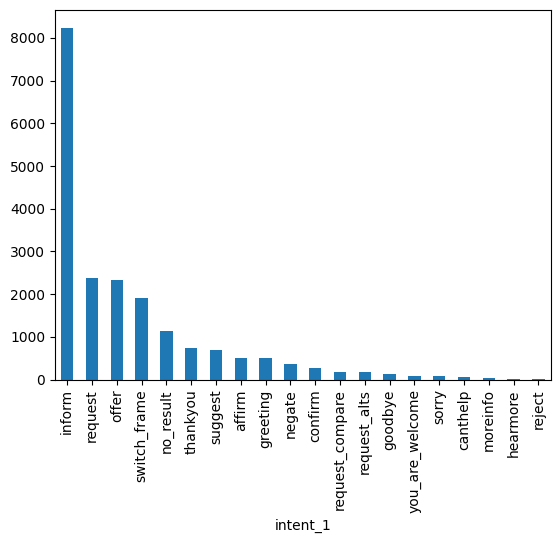

In [ ]:
print(df['intent_1'].value_counts())
#visualize to bar chart
df['intent_1'].value_counts().plot(kind='bar')
#print(len(df))

In [ ]:
inform_count = df['intent_1'].value_counts()[0]

In [ ]:
#replace intent_1 with value switch_frame with values from intent_2
df["intent_1"] = np.where(df["intent_1"] == "switch_frame", df["intent_2"], df["intent_1"])

#drop text with blank intent_1
df['intent_1'].replace('', np.nan, inplace=True)
df.dropna(subset=['intent_1'], inplace=True)

#use only text and intent_1 for training
columns = ['text','intent_1']
df = df[columns]

print(df['intent_1'].value_counts())

print(len(df))

display(df)

intent_1
inform             8710
request            3049
offer              2322
no_result          1148
thankyou            752
suggest             695
affirm              538
greeting            511
negate              358
confirm             307
moreinfo            221
request_compare     194
request_alts        179
goodbye             138
you_are_welcome      89
sorry                82
canthelp             58
hearmore             17
reject               13
Name: count, dtype: int64
19381


,text,intent_1
0,'I'd like to book a trip to Atlantis from Capr...,inform
1,"'Hi...I checked a few options for you, and unf...",no_result
2,"'Yes, how about going to Neverland from Capric...",inform
3,'I checked the availability for this date and ...,no_result
4,'I have no flexibility for dates... but I can ...,inform
...,...,...
19981,"'Yup it's from the 12th to the 25th, and it wi...",inform
19982,"'Ok perfect, book me!'",inform
19983,'Consider it done! Have a good trip :slightly_...,inform
19984,'Thanks!',thankyou


In [ ]:
def dict_intent(df, intent):
  return df.loc[df["intent_1"]==intent]

#request
request = dict_intent(df, "request")
#offer
offer = dict_intent(df, "offer")
#no_result
no_result = dict_intent(df, "no_result")
#thankyou
thankyou = dict_intent(df, "thankyou")
#suggest
suggest = dict_intent(df, "suggest")
#affirm
affirm = dict_intent(df, "affirm")
#greeting
greeting = dict_intent(df, "greeting")
#negate
negate = dict_intent(df, "negate")
#confirm
confirm = dict_intent(df, "confirm")
#request_compare
request_compare = dict_intent(df, "request_compare")
#request_alts
request_alts = dict_intent(df, "request_alts")
#goodbye
goodbye = dict_intent(df, "goodbye")
#you_are_welcome
you_are_welcome = dict_intent(df, "you_are_welcome")
#sorry
sorry = dict_intent(df, "sorry")
#canthelp
canthelp = dict_intent(df, "canthelp")
#moreinfo
moreinfo = dict_intent(df, "moreinfo")
#hearmore
hearmore = dict_intent(df, "hearmore")
#reject
reject = dict_intent(df, "reject")

intention_list = [request, offer, no_result, thankyou, suggest, affirm, greeting, negate, confirm, request_compare, request_alts, goodbye, you_are_welcome, sorry, canthelp, moreinfo, hearmore, reject]
#intention_list = list[request, offer, no_result, thankyou, suggest, affirm, greeting, negate, confirm, request_compare, request_alts, goodbye, you_are_welcome, sorry, canthelp, moreinfo, hearmore, reject]

'''
inform             8243
request            2378
offer              2322
switch_frame       1904
no_result          1148
thankyou            747
suggest             695
affirm              514
greeting            511
negate              354
confirm             260
request_compare     184
request_alts        170
goodbye             137
you_are_welcome      89
sorry                82
canthelp             58
moreinfo             42
hearmore             17
reject               13
Name: count, dtype: int64
'''

'\ninform             8243\nrequest            2378\noffer              2322\nswitch_frame       1904\nno_result          1148\nthankyou            747\nsuggest             695\naffirm              514\ngreeting            511\nnegate              354\nconfirm             260\nrequest_compare     184\nrequest_alts        170\ngoodbye             137\nyou_are_welcome      89\nsorry                82\ncanthelp             58\nmoreinfo             42\nhearmore             17\nreject               13\nName: count, dtype: int64\n'

In [ ]:
aug = naw.ContextualWordEmbsAug(
model_path='bert-base-uncased', action="insert")

#print(inform_count // len(no_result))

for i in range(inform_count // len(request)):
  for k, v in request.iterrows():
    augmented_text = aug.augment([v[0]])
    print(augmented_text[0] +"-"+v[1])
    df = pd.concat([df, pd.DataFrame({"text":augmented_text,"intent_1":v[1]})])

for i in range(inform_count // len(offer)):
  for k, v in offer.iterrows():
    augmented_text = aug.augment([v[0]])
    print(augmented_text[0] +"-"+v[1])
    df = pd.concat([df, pd.DataFrame({"text":augmented_text,"intent_1":v[1]})])

for i in range(inform_count // len(no_result)):
  for k, v in no_result.iterrows():
    augmented_text = aug.augment([v[0]])
    print(augmented_text[0] +"-"+v[1])
    df = pd.concat([df, pd.DataFrame({"text":augmented_text,"intent_1":v[1]})])

for i in range(inform_count // len(thankyou)):
  for k, v in thankyou.iterrows():
    augmented_text = aug.augment([v[0]])
    print(augmented_text[0] +"-"+v[1])
    df = pd.concat([df, pd.DataFrame({"text":augmented_text,"intent_1":v[1]})])

for i in range(inform_count // len(suggest)):
  for k, v in suggest.iterrows():
    augmented_text = aug.augment([v[0]])
    print(augmented_text[0] +"-"+v[1])
    df = pd.concat([df, pd.DataFrame({"text":augmented_text,"intent_1":v[1]})])

for i in range(inform_count // len(affirm)):
  for k, v in affirm.iterrows():
    augmented_text = aug.augment([v[0]])
    print(augmented_text[0] +"-"+v[1])
    df = pd.concat([df, pd.DataFrame({"text":augmented_text,"intent_1":v[1]})])

for i in range(inform_count // len(greeting)):
  for k, v in greeting.iterrows():
    augmented_text = aug.augment([v[0]])
    print(augmented_text[0] +"-"+v[1])
    df = pd.concat([df, pd.DataFrame({"text":augmented_text,"intent_1":v[1]})])

for i in range(inform_count // len(negate)):
  for k, v in negate.iterrows():
    augmented_text = aug.augment([v[0]])
    print(augmented_text[0] +"-"+v[1])
    df = pd.concat([df, pd.DataFrame({"text":augmented_text,"intent_1":v[1]})])

for i in range(inform_count // len(confirm)):
  for k, v in confirm.iterrows():
    augmented_text = aug.augment([v[0]])
    print(augmented_text[0] +"-"+v[1])
    df = pd.concat([df, pd.DataFrame({"text":augmented_text,"intent_1":v[1]})])

for i in range(inform_count // len(request_compare)):
  for k, v in request_compare.iterrows():
    augmented_text = aug.augment([v[0]])
    print(augmented_text[0] +"-"+v[1])
    df = pd.concat([df, pd.DataFrame({"text":augmented_text,"intent_1":v[1]})])

for i in range(inform_count // len(request_alts)):
  for k, v in request_alts.iterrows():
    augmented_text = aug.augment([v[0]])
    print(augmented_text[0] +"-"+v[1])
    df = pd.concat([df, pd.DataFrame({"text":augmented_text,"intent_1":v[1]})])

for i in range(inform_count // len(goodbye)):
  for k, v in goodbye.iterrows():
    augmented_text = aug.augment([v[0]])
    print(augmented_text[0] +"-"+v[1])
    df = pd.concat([df, pd.DataFrame({"text":augmented_text,"intent_1":v[1]})])

for i in range(inform_count // len(you_are_welcome)):
  for k, v in you_are_welcome.iterrows():
    augmented_text = aug.augment([v[0]])
    print(augmented_text[0] +"-"+v[1])
    df = pd.concat([df, pd.DataFrame({"text":augmented_text,"intent_1":v[1]})])

for i in range(inform_count // len(sorry)):
  for k, v in sorry.iterrows():
    augmented_text = aug.augment([v[0]])
    print(augmented_text[0] +"-"+v[1])
    df = pd.concat([df, pd.DataFrame({"text":augmented_text,"intent_1":v[1]})])

for i in range(inform_count // len(canthelp)):
  for k, v in canthelp.iterrows():
    augmented_text = aug.augment([v[0]])
    print(augmented_text[0] +"-"+v[1])
    df = pd.concat([df, pd.DataFrame({"text":augmented_text,"intent_1":v[1]})])

for i in range(inform_count // len(moreinfo)):
  for k, v in moreinfo.iterrows():
    augmented_text = aug.augment([v[0]])
    print(augmented_text[0] +"-"+v[1])
    df = pd.concat([df, pd.DataFrame({"text":augmented_text,"intent_1":v[1]})])

for i in range(inform_count // len(hearmore)):
  for k, v in hearmore.iterrows():
    augmented_text = aug.augment([v[0]])
    print(augmented_text[0] +"-"+v[1])
    df = pd.concat([df, pd.DataFrame({"text":augmented_text,"intent_1":v[1]})])

for i in range(inform_count // len(reject)):
  for k, v in reject.iterrows():
    augmented_text = aug.augment([v[0]])
    print(augmented_text[0] +"-"+v[1])
    df = pd.concat([df, pd.DataFrame({"text":augmented_text,"intent_1":v[1]})])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Streaming output truncated to the last 5000 lines.
' i probably am quite sorry, i... do just not understand. '-reject
' i don and ’ t... understand. what it do do you mean? '-reject
' that i do do not understand. who would if you not like to go to queenstown and leave again from essen? '-reject
' uh sorry, where will that you both be departing? '-reject
' ah sorry, obviously i don real ’ t understand. '-reject
' well i don know ’ sparhawk t understand. how fast many all of you are travelling? '-reject
' i really don ’... t really understand. '-reject
' but i would do surely not comprehend. '-reject
' i'of m not sure i will understand. will not you again be going travelling alone? '-reject
' no sorry, er i do not exactly understand '-reject
' i you do really not understand, so sorry. '-reject
' i'm truly sorry, i actually do but not really understand. '-reject
' look i'there m sorry, but i still do not understand the current query. '-reject
' and i am sorry, if i still do not perhaps un

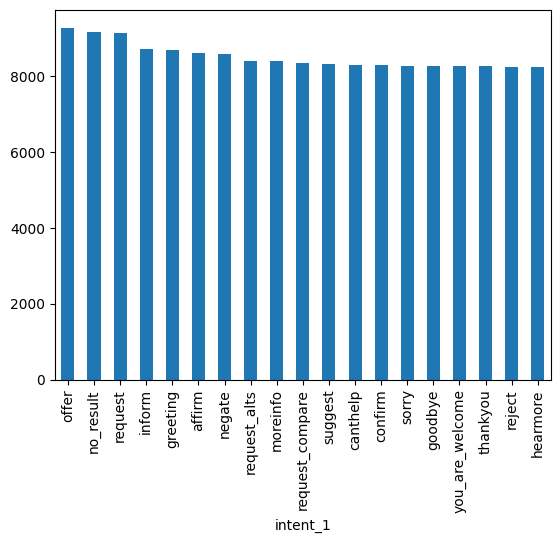

In [ ]:
df['intent_1'].value_counts().plot(kind='bar')
df.to_csv('augmented_data.csv')
df.to_csv('/content/drive/My Drive/augmented_data.csv')